In [174]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modelling imports
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, precision_recall_curve, f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor

import imblearn.over_sampling
import shap
import pickle

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9546-CQJSU,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
telco.shape

(7043, 21)

In [6]:
#drop rows where TotalCharges=" "
telco = telco[telco['TotalCharges']!=" "]

In [7]:
telco['TotalCharges'] = telco['TotalCharges'].astype(float)
telco.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,9546-CQJSU,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [8]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Feature Engineer Round 1:

**NOTE: these features were also created in SQL (DBeaver)**

In [9]:
telco['automaticpayment'] = telco['PaymentMethod'].replace({'Bank transfer (automatic)':'Yes','Credit card (automatic)':'Yes','Electronic check':'No','Mailed check':'No'})

In [10]:
telco['longtermcontract'] = telco['Contract'].replace({'Month-to-month':'No','One year':'Yes','Two year':'Yes'})

## Change Categoricals to Binaries:

In [175]:
cols = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'longtermcontract','automaticpayment','Churn']
telcoBi = pd.get_dummies(telco,columns=cols,drop_first=True)

In [176]:
telcoBi.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'longtermcontract_Yes', 'automaticpayment_Yes', 'Churn_Yes'],
      dtype='object')

In [177]:
telcoBi.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,longtermcontract_Yes,automaticpayment_Yes,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


## Split DF into TrainVal and Test

In [15]:
X_trainval, X_test, y_trainval, y_test = train_test_split(telcoBi.iloc[:,:-1], telcoBi.iloc[:,-1], 
                                                    test_size=0.20, random_state=44)

In [16]:
X_trainval.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,longtermcontract_Yes,automaticpayment_Yes
1061,4829-ZLJTK,1,72,112.40,8046.85,0,1,0,1,0,...,0,1,0,1,1,0,1,0,1,0
4684,6305-YLBMM,0,69,104.05,7262.00,1,0,0,1,0,...,0,1,1,0,1,0,0,0,1,1
61,1215-FIGMP,0,60,89.90,5450.70,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
85,4445-ZJNMU,0,9,99.30,918.75,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
6211,4439-JMPMT,0,5,85.75,470.95,0,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [17]:
telcoBi.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'longtermcontract_Yes', 'automaticpayment_Yes', 'Churn_Yes'],
      dtype='object')

In [19]:
print(X_trainval.shape,X_test.shape,y_trainval.shape,y_test.shape)

(5625, 33) (1407, 33) (5625,) (1407,)


In [20]:
train_df = X_trainval.copy()
train_df['Churn_Yes'] = y_trainval

train_df['Churned'] = train_df['Churn_Yes'].apply(lambda x: (x and 'Left') or 'Stayed')
train_df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,longtermcontract_Yes,automaticpayment_Yes,Churn_Yes,Churned
1061,4829-ZLJTK,1,72,112.40,8046.85,0,1,0,1,0,...,0,1,1,0,1,0,1,0,0,Stayed
4684,6305-YLBMM,0,69,104.05,7262.00,1,0,0,1,0,...,1,0,1,0,0,0,1,1,1,Left
61,1215-FIGMP,0,60,89.90,5450.70,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,Stayed
85,4445-ZJNMU,0,9,99.30,918.75,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,Stayed
6211,4439-JMPMT,0,5,85.75,470.95,0,1,1,1,0,...,0,0,1,0,1,0,0,0,1,Left


Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default bandwidth for data is 0; skipping density estimation.
Default 

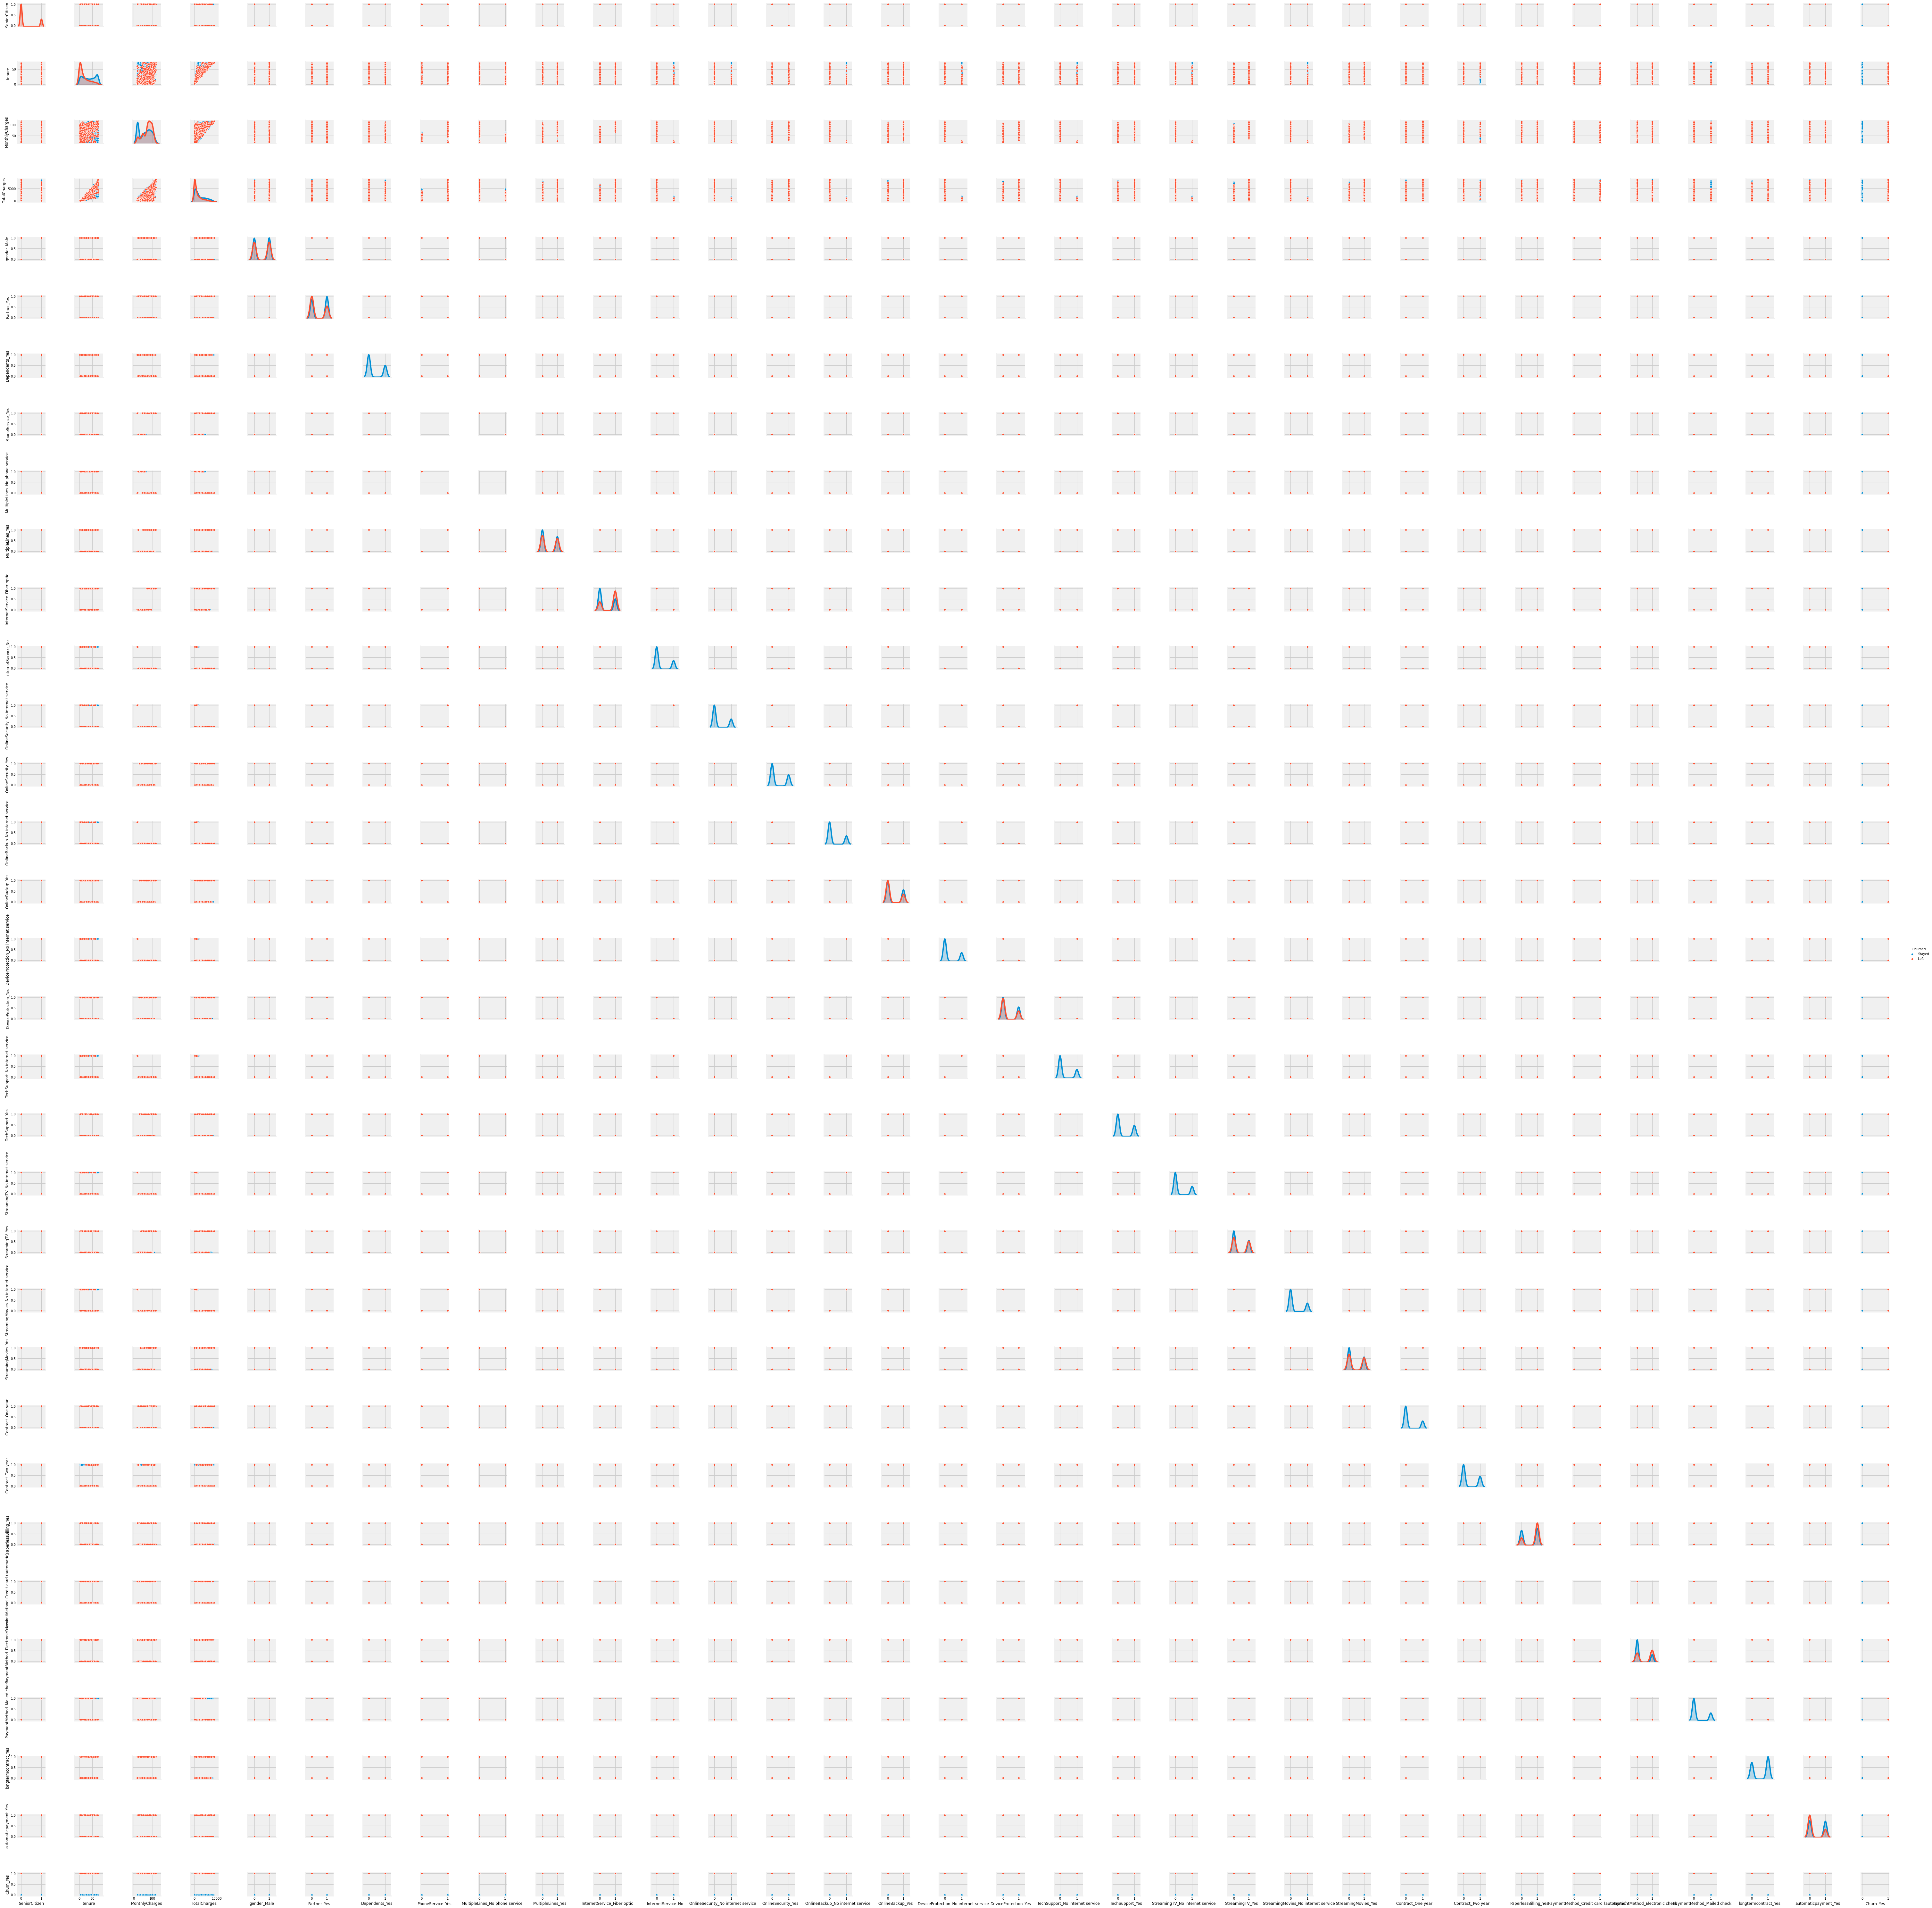

In [178]:
sns.pairplot(train_df, hue='Churned');

In [22]:
train_df['Dependents_Yes'].mean()

0.30044444444444446

**Many of the features did not show up well on the pair plot so I displayed the distribution of many of those features with relation to the target (Churn_Yes) below:**

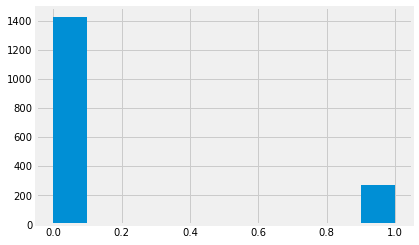

In [23]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['Dependents_Yes']==1].Churn_Yes);

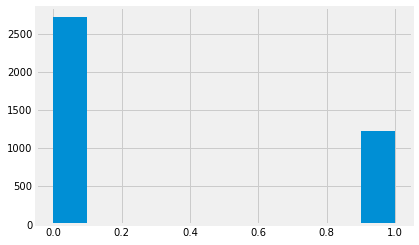

In [24]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['Dependents_Yes']==0].Churn_Yes);

Customers with Dependents are less likely to churn than Customers without dependents.

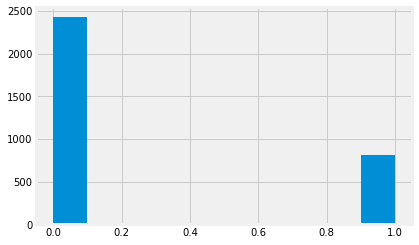

In [25]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['MultipleLines_Yes']==0].Churn_Yes);

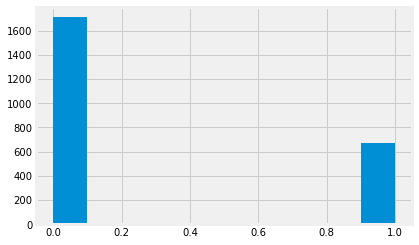

In [26]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['MultipleLines_Yes']==1].Churn_Yes);

There does not seem to be much of a difference in churn rates of MultipleLines=0 and MultipleLines=1

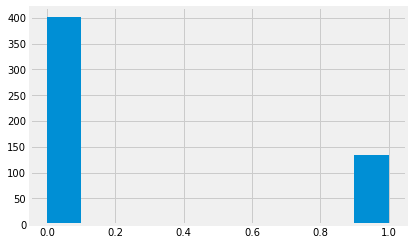

In [27]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['PhoneService_Yes']==0].Churn_Yes);

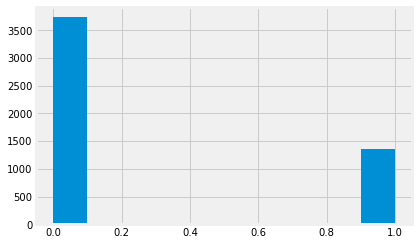

In [28]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['PhoneService_Yes']==1].Churn_Yes);

There does not appear to be much of a linear relationship between PhoneService_Yes and Churn_Yes. There are very few customers that do not have phoneservice.

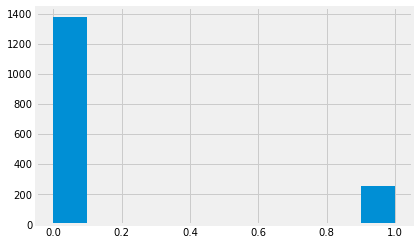

In [29]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['TechSupport_Yes']==1].Churn_Yes);

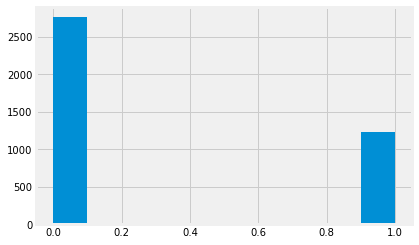

In [30]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['TechSupport_Yes']==0].Churn_Yes);

Customers with TechSupport are more likely to stay.

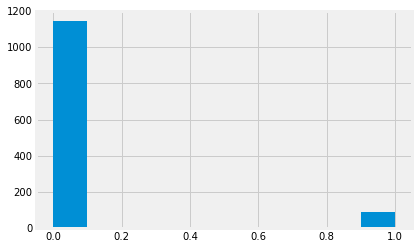

In [31]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['StreamingTV_No internet service']==1].Churn_Yes);

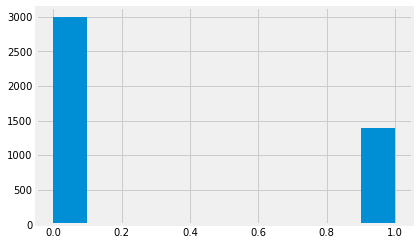

In [32]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['StreamingTV_No internet service']==0].Churn_Yes);

Customers that have no internet service (and therefor, no tv streaming) have a MUCH lower churn rate than those that do have an internet service.

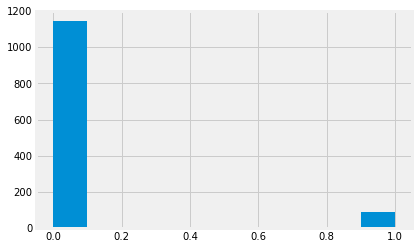

In [33]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['StreamingMovies_No internet service']==1].Churn_Yes);

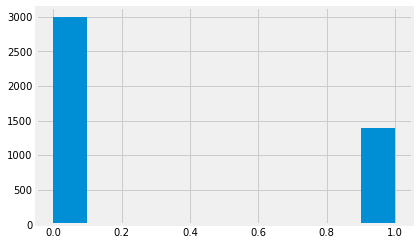

In [34]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['StreamingMovies_No internet service']==0].Churn_Yes);

Customers that have no internet service (and therefor, no movie streaming) have a MUCH lower churn rate than those that do have an internet service.

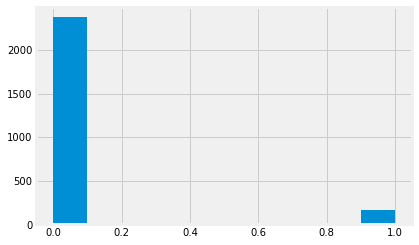

In [35]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['longtermcontract_Yes']==1].Churn_Yes);

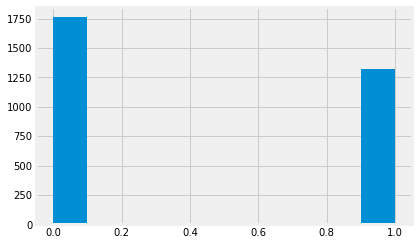

In [36]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['longtermcontract_Yes']==0].Churn_Yes);

Those with a longtermcontract (one year or two years) are much less likely to churn than month-to-month customers.

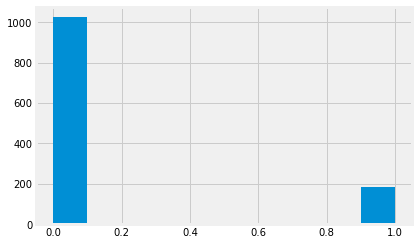

In [37]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['PaymentMethod_Credit card (automatic)']==1].Churn_Yes);

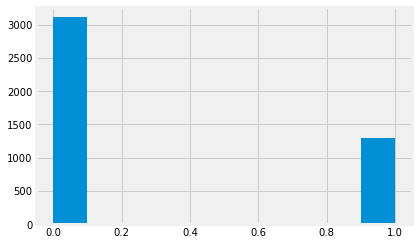

In [38]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['PaymentMethod_Credit card (automatic)']==0].Churn_Yes);

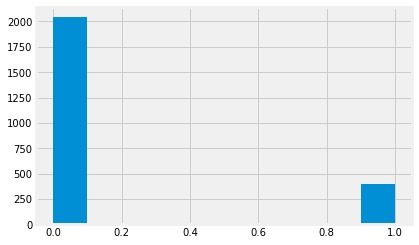

In [39]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['automaticpayment_Yes']==1].Churn_Yes);

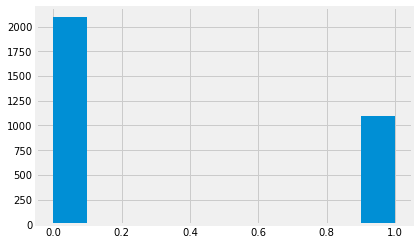

In [40]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['automaticpayment_Yes']==0].Churn_Yes);

Customers using an automatic payment method are much less likely to churn than customers without an automatic payment method.

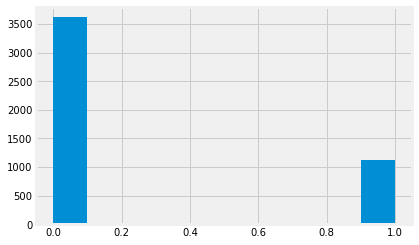

In [41]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['SeniorCitizen']==0].Churn_Yes);

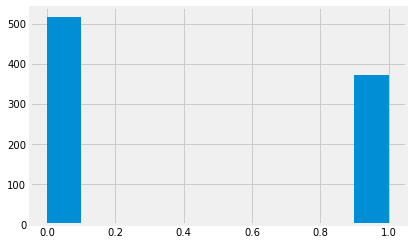

In [42]:
fig, ax = plt.subplots()
ax.hist(train_df[train_df['SeniorCitizen']==1].Churn_Yes);

SeniorCitizens are more likely to churn, but there are also much less seniorcitizen customers than there are other customers so shouldn't consider this feature heavily.

## A Few Promising Features to Explore Further:

Tenure, MonthlyCharges, InternetService_FiberOptic, TechSupport_Yes, StreamingTV_No internet service, StreamingTV_Yes, StreamingMovies_No internet, StreamingMovies_Yes, PaperlessBilling_Yes, PaymentMethod_Electronic check, longtermcontract_Yes, automaticpayment_Yes, Dependents_Yes, Partner_Yes

**feature engineer: column where partnerAND/ORdependent=yes, partnerNORdependent=NO**

In [43]:
#Partner and/or Dependent column:
telcoBi['MultiplePeople'] = np.where((telcoBi['Partner_Yes']==1)|(telcoBi['Dependents_Yes']==1),1,0)

In [44]:
telcoBi.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,longtermcontract_Yes,automaticpayment_Yes,Churn_Yes,MultiplePeople
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


(array([3006.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         746.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

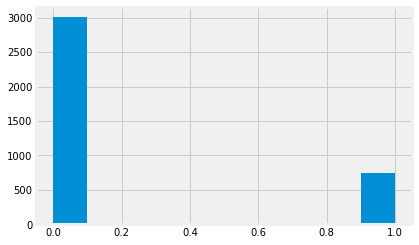

In [45]:
fig, ax = plt.subplots()
ax.hist(telcoBi[telcoBi['MultiplePeople']==1].Churn_Yes)

(array([2157.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1123.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

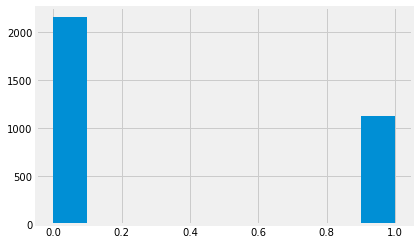

In [46]:
fig, ax = plt.subplots()
ax.hist(telcoBi[telcoBi['MultiplePeople']==0].Churn_Yes)

Customers with either a partner and/or dependent(s) are less likely to churn than those without either.

(array([3046.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1019.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

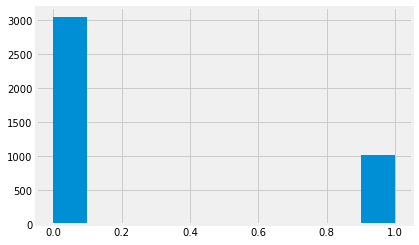

In [47]:
fig, ax = plt.subplots()
ax.hist(telcoBi[telcoBi['MultipleLines_Yes']==0].Churn_Yes)

(array([2117.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         850.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

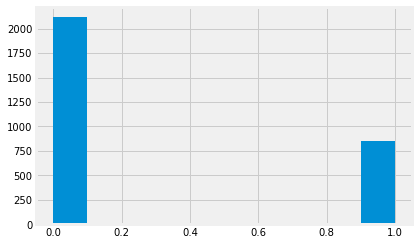

In [48]:
fig, ax = plt.subplots()
ax.hist(telcoBi[telcoBi['MultipleLines_Yes']==1].Churn_Yes)

In [49]:
mlyes = telcoBi[telcoBi['PhoneService_Yes']==1]
mlyes.shape

(6352, 35)

In [50]:
mlychurny = mlyes[mlyes['Churn_Yes']==0]
mlychurnn = mlyes[mlyes['Churn_Yes']==1]
print(mlychurny.shape, mlychurnn.shape) #.365

(4653, 35) (1699, 35)


In [51]:
mlno = telcoBi[telcoBi['PhoneService_Yes']==0]
mlno.shape

(680, 35)

In [52]:
mlnchurny = mlno[mlno['Churn_Yes']==0]
mlnchurnn = mlno[mlno['Churn_Yes']==1]
print(mlnchurny.shape, mlnchurnn.shape) #.33

(510, 35) (170, 35)


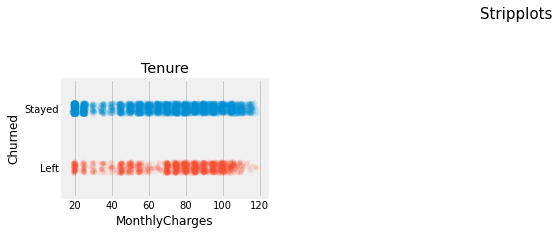

In [53]:
fig = plt.figure(figsize=[15,10])
fig.suptitle("Stripplots",fontsize=15)

ax1 = fig.add_subplot(4,4,1)
sns.stripplot(x='MonthlyCharges',y='Churned',jitter=True,data=train_df,alpha=0.1)
ax1.set_title("Tenure");

## Modeling
### Logistic Regression

In [54]:
X_trainval['MultiplePeople'] = np.where((X_trainval['Partner_Yes']==1)|(X_trainval['Dependents_Yes']==1),1,0)

In [55]:
X_trainval.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'longtermcontract_Yes', 'automaticpayment_Yes', 'MultiplePeople'],
      dtype='object')

In [56]:
columns_model1 = ['SeniorCitizen', 'tenure', 'MonthlyCharges','PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No','TechSupport_Yes','StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

#model 2: compile Contract into longtermcontract; PaymentMethod into automatic or not:
columns_model2 = ['SeniorCitizen', 'tenure', 'MonthlyCharges','PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No','TechSupport_Yes','StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'longtermcontract_Yes','automaticpayment_Yes', 'PaperlessBilling_Yes',]

#model 3: compile Contract into longtermcontract; leave PaymentMethod as is
columns_model3 = ['SeniorCitizen', 'tenure', 'MonthlyCharges','PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No','TechSupport_Yes','StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'longtermcontract_Yes', 'PaperlessBilling_Yes',
        'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

#model 4: leave contract as is, compile PaymentMethod into automatic or not
columns_model4 = ['SeniorCitizen', 'tenure', 'MonthlyCharges','PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No','TechSupport_Yes','StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year','automaticpayment_Yes', 'PaperlessBilling_Yes',]

columns_model5 = ['SeniorCitizen','MonthlyCharges',
 'PhoneService_Yes','MultipleLines_No phone service','MultipleLines_Yes',
 'InternetService_Fiber optic','InternetService_No','TechSupport_Yes',
 'StreamingTV_No internet service','StreamingTV_Yes','StreamingMovies_No internet service',
 'StreamingMovies_Yes','longtermcontract_Yes','automaticpayment_Yes','PaperlessBilling_Yes']

columns_simple = ['tenure', 'MonthlyCharges','longtermcontract_Yes','automaticpayment_Yes']

columns_model6 = ['tenure', 'MonthlyCharges','PhoneService_Yes',
       'InternetService_Fiber optic','TechSupport_Yes','StreamingTV_No internet service',
       'StreamingMovies_No internet service','PaperlessBilling_Yes',
       'longtermcontract_Yes', 'automaticpayment_Yes','MultiplePeople']

columns_model7 = ['tenure','MonthlyCharges','MultiplePeople','StreamingMovies_No internet service',
                 'StreamingTV_No internet service','TechSupport_Yes','InternetService_Fiber optic',
                 'PaperlessBilling_Yes','longtermcontract_Yes','automaticpayment_Yes']

columns_model8 = ['tenure', 'MonthlyCharges','longtermcontract_Yes','automaticpayment_Yes','MultiplePeople',
                 'InternetService_Fiber optic']

columns_model9 = ['SeniorCitizen', 'tenure', 'MonthlyCharges','PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'TechSupport_Yes','StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'MultiplePeople',
       'longtermcontract_Yes','automaticpayment_Yes', 'PaperlessBilling_Yes']

columns_model10 = ['tenure', 'MonthlyCharges','PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'TechSupport_Yes','StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'MultiplePeople',
       'longtermcontract_Yes','automaticpayment_Yes', 'PaperlessBilling_Yes']

columns_model11 = ['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'InternetService_Fiber optic',
       'TechSupport_Yes','StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'MultiplePeople',
       'longtermcontract_Yes','automaticpayment_Yes', 'PaperlessBilling_Yes']

## NEED TO SPLIT TRAINVAL into TRAIN and VAL BEFORE CV!

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=.25, random_state=3)

# Modeling (each function adjusts for class imbalance and scale)
## Logistic Regression:

In [61]:
def LogisticRegModelSMOTE(columns,y_trainval):
    '''
    Function that takes in the features to be used and the target.
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via SMOTE (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits Logistic Regression model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_lr, f1_lr, prec_lr, recall_lr, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
        X_tr_smote, y_tr_smote = smote.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_smote_scaled = std_scale.fit_transform(X_tr_smote)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
        
        #fit logistic regression
        
        lr_smote = LogisticRegression()
        
        lr_smote.fit(X_train_smote_scaled, y_tr_smote)
        
        #predictions/predict_probas on val:
        
        y_pred = lr_smote.predict(X_val_scaled)
        y_pred_proba = lr_smote.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_lr.append(accuracy_score(y_valcv,y_pred))
        f1_lr.append(f1_score(y_valcv,y_pred))
        recall_lr.append(recall_score(y_valcv,y_pred))
        prec_lr.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_lr):.3f} +- {np.std(accuracy_lr):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_lr):.3f} +- {np.std(f1_lr):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_lr):.3f} +- {np.std(recall_lr):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_lr):.3f} +- {np.std(prec_lr):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [62]:
LogisticRegModelSMOTE(columns_simple,y_trainval)

('Simple mean cv Accuracy: 0.688 +- 0.014',
 'Simple mean cv F1: 0.597 +- 0.023',
 'Simple mean cv Recall: 0.873 +- 0.016',
 'Simple mean cv Precision: 0.453 +- 0.023',
 'Simple mean cv AUC Score: 0.826 +- 0.011')

In [63]:
LogisticRegModelSMOTE(columns_model6,y_trainval)

('Simple mean cv Accuracy: 0.702 +- 0.018',
 'Simple mean cv F1: 0.605 +- 0.025',
 'Simple mean cv Recall: 0.864 +- 0.013',
 'Simple mean cv Precision: 0.466 +- 0.027',
 'Simple mean cv AUC Score: 0.839 +- 0.012')

In [64]:
LogisticRegModelSMOTE(columns_model2,y_trainval)

('Simple mean cv Accuracy: 0.704 +- 0.016',
 'Simple mean cv F1: 0.605 +- 0.024',
 'Simple mean cv Recall: 0.859 +- 0.011',
 'Simple mean cv Precision: 0.468 +- 0.027',
 'Simple mean cv AUC Score: 0.841 +- 0.010')

In [65]:
LogisticRegModelSMOTE(columns_model7,y_trainval)

('Simple mean cv Accuracy: 0.700 +- 0.014',
 'Simple mean cv F1: 0.601 +- 0.021',
 'Simple mean cv Recall: 0.856 +- 0.007',
 'Simple mean cv Precision: 0.463 +- 0.024',
 'Simple mean cv AUC Score: 0.836 +- 0.011')

In [66]:
LogisticRegModelSMOTE(columns_model8,y_trainval)

('Simple mean cv Accuracy: 0.686 +- 0.015',
 'Simple mean cv F1: 0.595 +- 0.025',
 'Simple mean cv Recall: 0.874 +- 0.020',
 'Simple mean cv Precision: 0.452 +- 0.025',
 'Simple mean cv AUC Score: 0.829 +- 0.013')

Model2 and Model6 had the best F1 scores for Logistic Regression with SMOTE oversampling.

In [67]:
def LogisticRegModelROS(columns,y_trainval):
    '''
    Function that takes in the features to be used and the target.
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via Random Over Sampling (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits Logistic Regression model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_lr, f1_lr, prec_lr, recall_lr, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        ROS = imblearn.over_sampling.RandomOverSampler(random_state=42)
    
        X_tr_ROS, y_tr_ROS = ROS.fit_sample(X_traincv, y_traincv) #xtr_ROS and y_tr_ROS shape is now 6588. There are now 3294 rows where y_tr_ROS=0 and y_tr_ROS=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_ROS_scaled = std_scale.fit_transform(X_tr_ROS)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
        
        #fit logistic regression
        
        lr_ROS = LogisticRegression()
        
        lr_ROS.fit(X_train_ROS_scaled, y_tr_ROS)
        
        #predictions&predict_probas of X_val_scaled:
        
        y_pred = lr_ROS.predict(X_val_scaled)
        y_pred_proba = lr_ROS.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_lr.append(accuracy_score(y_valcv,y_pred))
        f1_lr.append(f1_score(y_valcv,y_pred))
        recall_lr.append(recall_score(y_valcv,y_pred))
        prec_lr.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_lr):.3f} +- {np.std(accuracy_lr):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_lr):.3f} +- {np.std(f1_lr):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_lr):.3f} +- {np.std(recall_lr):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_lr):.3f} +- {np.std(prec_lr):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [68]:
LogisticRegModelROS(columns_simple,y_trainval)

('Simple mean cv Accuracy: 0.687 +- 0.014',
 'Simple mean cv F1: 0.596 +- 0.023',
 'Simple mean cv Recall: 0.873 +- 0.014',
 'Simple mean cv Precision: 0.453 +- 0.023',
 'Simple mean cv AUC Score: 0.827 +- 0.011')

In [69]:
LogisticRegModelROS(columns_model6,y_trainval)

('Simple mean cv Accuracy: 0.700 +- 0.017',
 'Simple mean cv F1: 0.603 +- 0.026',
 'Simple mean cv Recall: 0.863 +- 0.019',
 'Simple mean cv Precision: 0.464 +- 0.026',
 'Simple mean cv AUC Score: 0.839 +- 0.012')

In [70]:
LogisticRegModelROS(columns_model2,y_trainval)

('Simple mean cv Accuracy: 0.708 +- 0.013',
 'Simple mean cv F1: 0.607 +- 0.022',
 'Simple mean cv Recall: 0.853 +- 0.009',
 'Simple mean cv Precision: 0.471 +- 0.025',
 'Simple mean cv AUC Score: 0.842 +- 0.011')

In [71]:
LogisticRegModelROS(columns_model7,y_trainval)

('Simple mean cv Accuracy: 0.705 +- 0.015',
 'Simple mean cv F1: 0.605 +- 0.024',
 'Simple mean cv Recall: 0.856 +- 0.016',
 'Simple mean cv Precision: 0.469 +- 0.026',
 'Simple mean cv AUC Score: 0.837 +- 0.011')

In [72]:
LogisticRegModelROS(columns_model8,y_trainval)

('Simple mean cv Accuracy: 0.687 +- 0.016',
 'Simple mean cv F1: 0.596 +- 0.027',
 'Simple mean cv Recall: 0.874 +- 0.021',
 'Simple mean cv Precision: 0.452 +- 0.026',
 'Simple mean cv AUC Score: 0.830 +- 0.013')

Model2 had the best F1 score for Logistic Regression with Random Oversampling.

## KNN

In [73]:
def KNNROS(columns,y_trainval,num_neighbors):
    '''
    Function that takes in the features to be used, target, and knn hyperparameter (num_neighbors).
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via Random Over Sampling (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits KNN model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_knn, f1_knn, prec_knn, recall_knn, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        ROS = imblearn.over_sampling.RandomOverSampler(random_state=42)
    
        X_tr_ROS, y_tr_ROS = ROS.fit_sample(X_traincv, y_traincv) #xtr_ROS and y_tr_ROS shape is now 6588. There are now 3294 rows where y_tr_ROS=0 and y_tr_ROS=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_ROS_scaled = std_scale.fit_transform(X_tr_ROS)
        X_val_scaled = std_scale.fit_transform(X_valcv) # val only gets scaled, (no smote)
        
        #fit KNN
    
        neigh_ROS = KNeighborsClassifier(n_neighbors=num_neighbors)
        neigh_ROS.fit(X_train_ROS_scaled,y_tr_ROS)
    
        #predictions&predict_probas for X_val_scaled
        
        y_pred = neigh_ROS.predict(X_val_scaled)
        y_pred_proba = neigh_ROS.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_knn.append(accuracy_score(y_valcv,y_pred))
        f1_knn.append(f1_score(y_valcv,y_pred))
        recall_knn.append(recall_score(y_valcv,y_pred))
        prec_knn.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_knn):.3f} +- {np.std(accuracy_knn):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_knn):.3f} +- {np.std(f1_knn):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_knn):.3f} +- {np.std(recall_knn):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_knn):.3f} +- {np.std(prec_knn):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [74]:
#k=sqrt(n) = sqrt(6588) = 81
KNNROS(columns_simple,y_trainval,81)

('Simple mean cv Accuracy: 0.710 +- 0.012',
 'Simple mean cv F1: 0.600 +- 0.024',
 'Simple mean cv Recall: 0.824 +- 0.028',
 'Simple mean cv Precision: 0.472 +- 0.022',
 'Simple mean cv AUC Score: 0.823 +- 0.014')

In [75]:
#k=sqrt(n) = sqrt(6588) = 81
KNNROS(columns_model6,y_trainval,81)

('Simple mean cv Accuracy: 0.701 +- 0.019',
 'Simple mean cv F1: 0.603 +- 0.028',
 'Simple mean cv Recall: 0.860 +- 0.020',
 'Simple mean cv Precision: 0.465 +- 0.028',
 'Simple mean cv AUC Score: 0.827 +- 0.016')

In [76]:
#k=sqrt(n) = sqrt(6588) = 81
KNNROS(columns_model2,y_trainval,81)

('Simple mean cv Accuracy: 0.673 +- 0.018',
 'Simple mean cv F1: 0.586 +- 0.022',
 'Simple mean cv Recall: 0.875 +- 0.008',
 'Simple mean cv Precision: 0.441 +- 0.025',
 'Simple mean cv AUC Score: 0.823 +- 0.009')

In [77]:
#k=sqrt(n) = sqrt(6588) = 81
KNNROS(columns_model7,y_trainval,81)

('Simple mean cv Accuracy: 0.707 +- 0.019',
 'Simple mean cv F1: 0.605 +- 0.023',
 'Simple mean cv Recall: 0.849 +- 0.011',
 'Simple mean cv Precision: 0.470 +- 0.027',
 'Simple mean cv AUC Score: 0.826 +- 0.013')

In [78]:
#k=sqrt(n) = sqrt(6588) = 81
KNNROS(columns_model8,y_trainval,81)

('Simple mean cv Accuracy: 0.722 +- 0.013',
 'Simple mean cv F1: 0.610 +- 0.024',
 'Simple mean cv Recall: 0.820 +- 0.028',
 'Simple mean cv Precision: 0.485 +- 0.023',
 'Simple mean cv AUC Score: 0.826 +- 0.015')

Model8 had the best F1 for KNN with Random Over Sampling. This is also the best model and column combination so far, in terms of F1 score.

In [80]:
def KNNSMOTE(columns,y_trainval,num_neighbors):
    '''
    Function that takes in the features to be used, target, and knn hyperparameter (num_neighbors).
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via SMOTE (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits KNN model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_knn, f1_knn, prec_knn, recall_knn, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
        X_tr_smote, y_tr_smote = smote.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_smote_scaled = std_scale.fit_transform(X_tr_smote)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
   
        #fit KNN
    
        neigh_smote = KNeighborsClassifier(n_neighbors=num_neighbors)
        neigh_smote.fit(X_train_smote_scaled,y_tr_smote)
    
        #predictions&predict_probas for X_val_scaled
        
        y_pred = neigh_smote.predict(X_val_scaled)
        y_pred_proba = neigh_smote.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_knn.append(accuracy_score(y_valcv,y_pred))
        f1_knn.append(f1_score(y_valcv,y_pred))
        recall_knn.append(recall_score(y_valcv,y_pred))
        prec_knn.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_knn):.3f} +- {np.std(accuracy_knn):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_knn):.3f} +- {np.std(f1_knn):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_knn):.3f} +- {np.std(recall_knn):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_knn):.3f} +- {np.std(prec_knn):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [81]:
#k=sqrt(n) = sqrt(6588) = 81 (look at the 81 nearest neighbors)
KNNSMOTE(columns_simple,y_trainval,81)

('Simple mean cv Accuracy: 0.729 +- 0.015',
 'Simple mean cv F1: 0.605 +- 0.030',
 'Simple mean cv Recall: 0.788 +- 0.028',
 'Simple mean cv Precision: 0.492 +- 0.030',
 'Simple mean cv AUC Score: 0.824 +- 0.015')

In [82]:
#k=sqrt(n) = sqrt(6588) = 81
KNNSMOTE(columns_model6,y_trainval,81)

('Simple mean cv Accuracy: 0.694 +- 0.016',
 'Simple mean cv F1: 0.598 +- 0.024',
 'Simple mean cv Recall: 0.861 +- 0.011',
 'Simple mean cv Precision: 0.459 +- 0.026',
 'Simple mean cv AUC Score: 0.826 +- 0.016')

In [83]:
#k=sqrt(n) = sqrt(6588) = 81
KNNSMOTE(columns_model2,y_trainval,81)

('Simple mean cv Accuracy: 0.662 +- 0.019',
 'Simple mean cv F1: 0.582 +- 0.023',
 'Simple mean cv Recall: 0.891 +- 0.003',
 'Simple mean cv Precision: 0.433 +- 0.026',
 'Simple mean cv AUC Score: 0.824 +- 0.011')

In [84]:
#k=sqrt(n) = sqrt(6588) = 81
KNNSMOTE(columns_model7,y_trainval,81)

('Simple mean cv Accuracy: 0.695 +- 0.017',
 'Simple mean cv F1: 0.597 +- 0.024',
 'Simple mean cv Recall: 0.854 +- 0.018',
 'Simple mean cv Precision: 0.459 +- 0.027',
 'Simple mean cv AUC Score: 0.825 +- 0.014')

In [85]:
#k=sqrt(n) = sqrt(6588) = 81
KNNSMOTE(columns_model8,y_trainval,81)

('Simple mean cv Accuracy: 0.742 +- 0.015',
 'Simple mean cv F1: 0.614 +- 0.028',
 'Simple mean cv Recall: 0.777 +- 0.029',
 'Simple mean cv Precision: 0.507 +- 0.031',
 'Simple mean cv AUC Score: 0.827 +- 0.017')

KNN with SMOTE over sampling beat out KNN with Random Oversampling. Best columns so far is columns_model8.

## Bernoulli Naive Bayes:
Bernoulli (use when most columns are 0s and 1s) -- this should work great with this dataset!

In [86]:
def NBBernSMOTE(columns,y_trainval):
    '''
    Function that takes in the features to be used and the target.
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via SMOTE (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits Bernoulli Naive Bayes model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_nb, f1_nb, prec_nb, recall_nb, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
        X_tr_smote, y_tr_smote = smote.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_smote_scaled = std_scale.fit_transform(X_tr_smote)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
        
        #fit Bernoulli Naive Bayes
        
        nb_smote = BernoulliNB()
        
        nb_smote.fit(X_train_smote_scaled, y_tr_smote)
        
        #probabilities&predict_probas for X_val_scaled
        
        y_pred = nb_smote.predict(X_val_scaled)
        y_pred_proba = nb_smote.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_nb.append(accuracy_score(y_valcv,y_pred))
        f1_nb.append(f1_score(y_valcv,y_pred))
        recall_nb.append(recall_score(y_valcv,y_pred))
        prec_nb.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_nb):.3f} +- {np.std(accuracy_nb):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_nb):.3f} +- {np.std(f1_nb):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_nb):.3f} +- {np.std(recall_nb):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_nb):.3f} +- {np.std(prec_nb):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [87]:
NBBernSMOTE(columns_simple,y_trainval)

('Simple mean cv Accuracy: 0.690 +- 0.011',
 'Simple mean cv F1: 0.586 +- 0.022',
 'Simple mean cv Recall: 0.830 +- 0.025',
 'Simple mean cv Precision: 0.453 +- 0.021',
 'Simple mean cv AUC Score: 0.798 +- 0.012')

In [88]:
NBBernSMOTE(columns_model6,y_trainval)

('Simple mean cv Accuracy: 0.723 +- 0.010',
 'Simple mean cv F1: 0.608 +- 0.020',
 'Simple mean cv Recall: 0.815 +- 0.022',
 'Simple mean cv Precision: 0.486 +- 0.020',
 'Simple mean cv AUC Score: 0.818 +- 0.009')

In [89]:
NBBernSMOTE(columns_model2,y_trainval)

('Simple mean cv Accuracy: 0.706 +- 0.006',
 'Simple mean cv F1: 0.596 +- 0.017',
 'Simple mean cv Recall: 0.821 +- 0.014',
 'Simple mean cv Precision: 0.468 +- 0.019',
 'Simple mean cv AUC Score: 0.810 +- 0.009')

In [90]:
NBBernSMOTE(columns_model7,y_trainval)

('Simple mean cv Accuracy: 0.723 +- 0.010',
 'Simple mean cv F1: 0.608 +- 0.020',
 'Simple mean cv Recall: 0.815 +- 0.022',
 'Simple mean cv Precision: 0.485 +- 0.020',
 'Simple mean cv AUC Score: 0.818 +- 0.009')

In [91]:
NBBernSMOTE(columns_model8,y_trainval)

('Simple mean cv Accuracy: 0.728 +- 0.014',
 'Simple mean cv F1: 0.603 +- 0.030',
 'Simple mean cv Recall: 0.783 +- 0.042',
 'Simple mean cv Precision: 0.490 +- 0.027',
 'Simple mean cv AUC Score: 0.813 +- 0.014')

Naive Bayes Bernoulli did not end up working as well as I thought it would. Best model is still KNN ROS.

In [92]:
def NBBernROS(columns,y_trainval):
    '''
    Function that takes in the features to be used and the target.
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via Random Over Sampling (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits Bernoulli Naive Bayes model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_nb, f1_nb, prec_nb, recall_nb, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        ROS = imblearn.over_sampling.RandomOverSampler(random_state=42)
    
        X_tr_ros, y_tr_ros = ROS.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_ros_scaled = std_scale.fit_transform(X_tr_ros)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
        
        #fit Bernoulli Naive Bayes
        
        nb_ros = BernoulliNB()
        
        nb_ros.fit(X_train_ros_scaled, y_tr_ros)
        
        #predictions&predict_probas for X_val_scaled
        
        y_pred = nb_ros.predict(X_val_scaled)
        y_pred_proba = nb_ros.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_nb.append(accuracy_score(y_valcv,y_pred))
        f1_nb.append(f1_score(y_valcv,y_pred))
        recall_nb.append(recall_score(y_valcv,y_pred))
        prec_nb.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_nb):.3f} +- {np.std(accuracy_nb):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_nb):.3f} +- {np.std(f1_nb):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_nb):.3f} +- {np.std(recall_nb):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_nb):.3f} +- {np.std(prec_nb):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [93]:
NBBernROS(columns_simple,y_trainval)

('Simple mean cv Accuracy: 0.690 +- 0.011',
 'Simple mean cv F1: 0.586 +- 0.022',
 'Simple mean cv Recall: 0.830 +- 0.025',
 'Simple mean cv Precision: 0.453 +- 0.021',
 'Simple mean cv AUC Score: 0.795 +- 0.013')

In [94]:
NBBernROS(columns_model6,y_trainval)

('Simple mean cv Accuracy: 0.728 +- 0.010',
 'Simple mean cv F1: 0.608 +- 0.021',
 'Simple mean cv Recall: 0.800 +- 0.026',
 'Simple mean cv Precision: 0.491 +- 0.021',
 'Simple mean cv AUC Score: 0.820 +- 0.010')

In [95]:
NBBernROS(columns_model2,y_trainval)

('Simple mean cv Accuracy: 0.713 +- 0.010',
 'Simple mean cv F1: 0.602 +- 0.017',
 'Simple mean cv Recall: 0.824 +- 0.017',
 'Simple mean cv Precision: 0.475 +- 0.021',
 'Simple mean cv AUC Score: 0.812 +- 0.008')

In [96]:
NBBernROS(columns_model7,y_trainval)

('Simple mean cv Accuracy: 0.728 +- 0.010',
 'Simple mean cv F1: 0.609 +- 0.020',
 'Simple mean cv Recall: 0.803 +- 0.024',
 'Simple mean cv Precision: 0.491 +- 0.021',
 'Simple mean cv AUC Score: 0.820 +- 0.010')

In [97]:
NBBernROS(columns_model8,y_trainval)

('Simple mean cv Accuracy: 0.723 +- 0.016',
 'Simple mean cv F1: 0.596 +- 0.029',
 'Simple mean cv Recall: 0.775 +- 0.043',
 'Simple mean cv Precision: 0.486 +- 0.030',
 'Simple mean cv AUC Score: 0.812 +- 0.014')

This was the best model so far for columns_model6 and columns_model7 (for F1 optimization).

## Gaussian Naive Bayes:

In [98]:
def NBGaussSMOTE(columns,y_trainval):
    '''
    Function that takes in the features to be used and the target.
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via SMOTE (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits Gaussian Naive Bayes model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_nb, f1_nb, prec_nb, recall_nb, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        smote = imblearn.over_sampling.SMOTE(random_state = 42)
    
        X_tr_smote, y_tr_smote = smote.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_smote_scaled = std_scale.fit_transform(X_tr_smote)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
        
        #fit Gaussian Naive Bayes
        
        nb_smote = GaussianNB()
        
        nb_smote.fit(X_train_smote_scaled, y_tr_smote)
        
        #predictions&predict_probas for X_val_scaled
        
        y_pred = nb_smote.predict(X_val_scaled)
        y_pred_proba = nb_smote.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_nb.append(accuracy_score(y_valcv,y_pred))
        f1_nb.append(f1_score(y_valcv,y_pred))
        recall_nb.append(recall_score(y_valcv,y_pred))
        prec_nb.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_nb):.3f} +- {np.std(accuracy_nb):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_nb):.3f} +- {np.std(f1_nb):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_nb):.3f} +- {np.std(recall_nb):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_nb):.3f} +- {np.std(prec_nb):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [99]:
NBGaussSMOTE(columns_simple,y_trainval)

('Simple mean cv Accuracy: 0.673 +- 0.013',
 'Simple mean cv F1: 0.584 +- 0.021',
 'Simple mean cv Recall: 0.869 +- 0.021',
 'Simple mean cv Precision: 0.440 +- 0.020',
 'Simple mean cv AUC Score: 0.810 +- 0.012')

In [100]:
NBGaussSMOTE(columns_model6,y_trainval)

('Simple mean cv Accuracy: 0.696 +- 0.007',
 'Simple mean cv F1: 0.596 +- 0.016',
 'Simple mean cv Recall: 0.848 +- 0.011',
 'Simple mean cv Precision: 0.459 +- 0.018',
 'Simple mean cv AUC Score: 0.818 +- 0.007')

In [101]:
NBGaussSMOTE(columns_model2,y_trainval)

('Simple mean cv Accuracy: 0.665 +- 0.011',
 'Simple mean cv F1: 0.579 +- 0.017',
 'Simple mean cv Recall: 0.870 +- 0.009',
 'Simple mean cv Precision: 0.434 +- 0.021',
 'Simple mean cv AUC Score: 0.814 +- 0.008')

In [102]:
NBGaussSMOTE(columns_model7,y_trainval)

('Simple mean cv Accuracy: 0.696 +- 0.006',
 'Simple mean cv F1: 0.597 +- 0.017',
 'Simple mean cv Recall: 0.852 +- 0.009',
 'Simple mean cv Precision: 0.459 +- 0.019',
 'Simple mean cv AUC Score: 0.819 +- 0.007')

In [103]:
NBGaussSMOTE(columns_model8,y_trainval)

('Simple mean cv Accuracy: 0.687 +- 0.009',
 'Simple mean cv F1: 0.592 +- 0.019',
 'Simple mean cv Recall: 0.862 +- 0.021',
 'Simple mean cv Precision: 0.451 +- 0.017',
 'Simple mean cv AUC Score: 0.823 +- 0.013')

In [104]:
def NBGaussROS(columns,y_trainval):
    '''
    Function that takes in the features to be used and the target.
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via Random Over Sampling (on train only, not on val).
    Then, scales and transforms the train and val features with StandardScaler.
    Lastly, fits Gaussian Naive Bayes model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_nb, f1_nb, prec_nb, recall_nb, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        ROS = imblearn.over_sampling.RandomOverSampler(random_state=42)
    
        X_tr_ros, y_tr_ros = ROS.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
        #now scale
        
        std_scale = StandardScaler()
        X_train_ros_scaled = std_scale.fit_transform(X_tr_ros)
        X_val_scaled = std_scale.fit_transform(X_valcv) # scale val only, (no smote)
        
        #fit Gaussian Naive Bayes
        
        nb_ros = GaussianNB()
        
        nb_ros.fit(X_train_ros_scaled, y_tr_ros)
        
        #predictions&predict_probas
        
        y_pred = nb_ros.predict(X_val_scaled)
        y_pred_proba = nb_ros.predict_proba(X_val_scaled)[:,1]
        
        #output metrics
        accuracy_nb.append(accuracy_score(y_valcv,y_pred))
        f1_nb.append(f1_score(y_valcv,y_pred))
        recall_nb.append(recall_score(y_valcv,y_pred))
        prec_nb.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_nb):.3f} +- {np.std(accuracy_nb):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_nb):.3f} +- {np.std(f1_nb):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_nb):.3f} +- {np.std(recall_nb):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_nb):.3f} +- {np.std(prec_nb):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [105]:
NBGaussROS(columns_simple,y_trainval)

('Simple mean cv Accuracy: 0.672 +- 0.013',
 'Simple mean cv F1: 0.584 +- 0.021',
 'Simple mean cv Recall: 0.870 +- 0.021',
 'Simple mean cv Precision: 0.439 +- 0.020',
 'Simple mean cv AUC Score: 0.811 +- 0.012')

In [106]:
NBGaussROS(columns_model6,y_trainval)

('Simple mean cv Accuracy: 0.688 +- 0.009',
 'Simple mean cv F1: 0.592 +- 0.017',
 'Simple mean cv Recall: 0.858 +- 0.008',
 'Simple mean cv Precision: 0.452 +- 0.019',
 'Simple mean cv AUC Score: 0.819 +- 0.007')

In [107]:
NBGaussROS(columns_model2,y_trainval)

('Simple mean cv Accuracy: 0.651 +- 0.012',
 'Simple mean cv F1: 0.572 +- 0.019',
 'Simple mean cv Recall: 0.883 +- 0.007',
 'Simple mean cv Precision: 0.423 +- 0.021',
 'Simple mean cv AUC Score: 0.814 +- 0.007')

In [108]:
NBGaussROS(columns_model7,y_trainval)

('Simple mean cv Accuracy: 0.687 +- 0.008',
 'Simple mean cv F1: 0.592 +- 0.017',
 'Simple mean cv Recall: 0.858 +- 0.008',
 'Simple mean cv Precision: 0.452 +- 0.018',
 'Simple mean cv AUC Score: 0.820 +- 0.007')

In [109]:
NBGaussROS(columns_model8,y_trainval)

('Simple mean cv Accuracy: 0.684 +- 0.007',
 'Simple mean cv F1: 0.591 +- 0.019',
 'Simple mean cv Recall: 0.865 +- 0.021',
 'Simple mean cv Precision: 0.449 +- 0.018',
 'Simple mean cv AUC Score: 0.824 +- 0.013')

Gaussian Naive Bayes has overall done the worst on this data (this makes sense because Gaussian Naive Bayes works best on mostly continuous features and I did not have hardly any continuous features).

## Decision Trees and Random Forests:

In [110]:
def DecisionTreeROS(columns,y_trainval,max_depth):
    '''
    Function that takes in the features to be used, target, and Decision Tree hyperparameter (max_depth).
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via Random Over Sampling (on train only, not on val).
    Lastly, fits Decision Tree Classifier model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_dt, f1_dt, prec_dt, recall_dt, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        ROS = imblearn.over_sampling.RandomOverSampler(random_state=42)
    
        X_tr_ros, y_tr_ros = ROS.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
  
        #fit Decision Tree
        
        dt_ros = DecisionTreeClassifier(max_depth=max_depth)
        
        dt_ros.fit(X_tr_ros, y_tr_ros)
        
        #output metrics
        
        y_pred = dt_ros.predict(X_valcv)
        y_pred_proba = dt_ros.predict_proba(X_valcv)[:,1]
        
        #output metrics
        accuracy_dt.append(accuracy_score(y_valcv,y_pred))
        f1_dt.append(f1_score(y_valcv,y_pred))
        recall_dt.append(recall_score(y_valcv,y_pred))
        prec_dt.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_dt):.3f} +- {np.std(accuracy_dt):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_dt):.3f} +- {np.std(f1_dt):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_dt):.3f} +- {np.std(recall_dt):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_dt):.3f} +- {np.std(prec_dt):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [111]:
DecisionTreeROS(columns_simple,y_trainval,5)

('Simple mean cv Accuracy: 0.734 +- 0.013',
 'Simple mean cv F1: 0.610 +- 0.021',
 'Simple mean cv Recall: 0.788 +- 0.045',
 'Simple mean cv Precision: 0.499 +- 0.019',
 'Simple mean cv AUC Score: 0.818 +- 0.015')

In [112]:
DecisionTreeROS(columns_model6,y_trainval,5)

('Simple mean cv Accuracy: 0.739 +- 0.016',
 'Simple mean cv F1: 0.617 +- 0.025',
 'Simple mean cv Recall: 0.797 +- 0.035',
 'Simple mean cv Precision: 0.505 +- 0.030',
 'Simple mean cv AUC Score: 0.821 +- 0.015')

In [113]:
DecisionTreeROS(columns_model2,y_trainval,5)

('Simple mean cv Accuracy: 0.740 +- 0.018',
 'Simple mean cv F1: 0.618 +- 0.025',
 'Simple mean cv Recall: 0.795 +- 0.036',
 'Simple mean cv Precision: 0.506 +- 0.032',
 'Simple mean cv AUC Score: 0.823 +- 0.016')

In [114]:
DecisionTreeROS(columns_model7,y_trainval,5)

('Simple mean cv Accuracy: 0.740 +- 0.018',
 'Simple mean cv F1: 0.614 +- 0.021',
 'Simple mean cv Recall: 0.782 +- 0.049',
 'Simple mean cv Precision: 0.507 +- 0.021',
 'Simple mean cv AUC Score: 0.823 +- 0.013')

In [115]:
DecisionTreeROS(columns_model8,y_trainval,5)

('Simple mean cv Accuracy: 0.743 +- 0.020',
 'Simple mean cv F1: 0.617 +- 0.019',
 'Simple mean cv Recall: 0.782 +- 0.053',
 'Simple mean cv Precision: 0.510 +- 0.020',
 'Simple mean cv AUC Score: 0.824 +- 0.015')

Decision Tree has done much better than any of the other models so far.

In [117]:
def DecisionTreeSMOTE(columns,y_trainval,max_depth):
    '''
    Function that takes in the features to be used, target, and Decision Tree hyperparameter (max_depth).
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via SMOTE (on train only, not on val).
    Lastly, fits Decision Tree Classifier model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_dt, f1_dt, prec_dt, recall_dt, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        SMOTE = imblearn.over_sampling.SMOTE(random_state=42)
    
        X_tr_smote, y_tr_smote = SMOTE.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
  
        #fit Decision Tree
        
        dt_smote = DecisionTreeClassifier(max_depth=max_depth)
        
        dt_smote.fit(X_tr_smote, y_tr_smote)
        
        #predictions&predict_probas for X_valcv
        
        y_pred = dt_smote.predict(X_valcv)
        y_pred_proba = dt_smote.predict_proba(X_valcv)[:,1]
        
        #output metrics
        accuracy_dt.append(accuracy_score(y_valcv,y_pred))
        f1_dt.append(f1_score(y_valcv,y_pred))
        recall_dt.append(recall_score(y_valcv,y_pred))
        prec_dt.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_dt):.3f} +- {np.std(accuracy_dt):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_dt):.3f} +- {np.std(f1_dt):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_dt):.3f} +- {np.std(recall_dt):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_dt):.3f} +- {np.std(prec_dt):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [118]:
DecisionTreeSMOTE(columns_simple,y_trainval,5)

('Simple mean cv Accuracy: 0.767 +- 0.010',
 'Simple mean cv F1: 0.597 +- 0.032',
 'Simple mean cv Recall: 0.656 +- 0.048',
 'Simple mean cv Precision: 0.549 +- 0.025',
 'Simple mean cv AUC Score: 0.815 +- 0.017')

In [119]:
DecisionTreeSMOTE(columns_model6,y_trainval,5)

('Simple mean cv Accuracy: 0.758 +- 0.018',
 'Simple mean cv F1: 0.594 +- 0.020',
 'Simple mean cv Recall: 0.670 +- 0.043',
 'Simple mean cv Precision: 0.537 +- 0.043',
 'Simple mean cv AUC Score: 0.811 +- 0.014')

In [120]:
DecisionTreeSMOTE(columns_model2,y_trainval,5)

('Simple mean cv Accuracy: 0.759 +- 0.019',
 'Simple mean cv F1: 0.604 +- 0.031',
 'Simple mean cv Recall: 0.696 +- 0.057',
 'Simple mean cv Precision: 0.537 +- 0.038',
 'Simple mean cv AUC Score: 0.813 +- 0.018')

In [121]:
DecisionTreeSMOTE(columns_model7,y_trainval,5)

('Simple mean cv Accuracy: 0.766 +- 0.016',
 'Simple mean cv F1: 0.600 +- 0.028',
 'Simple mean cv Recall: 0.664 +- 0.040',
 'Simple mean cv Precision: 0.550 +- 0.042',
 'Simple mean cv AUC Score: 0.815 +- 0.017')

In [122]:
DecisionTreeSMOTE(columns_model8,y_trainval,5)

('Simple mean cv Accuracy: 0.773 +- 0.007',
 'Simple mean cv F1: 0.607 +- 0.025',
 'Simple mean cv Recall: 0.665 +- 0.036',
 'Simple mean cv Precision: 0.560 +- 0.021',
 'Simple mean cv AUC Score: 0.820 +- 0.009')

Decision Tree with Random Over Sampling performed better for F1 than Decision Tree with SMOTE.

In [123]:
def RandomForestROS(columns,y_trainval,n_estimators,max_depth):
        '''
    Function that takes in the features to be used, target, and Random Forest hyperparameters (n_estimators & max_depth).
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via Random Over Sampling (on train only, not on val).
    Lastly, fits Random Forest Classifier model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_rf, f1_rf, prec_rf, recall_rf, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        ROS = imblearn.over_sampling.RandomOverSampler(random_state=42)
    
        X_tr_ros, y_tr_ros = ROS.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
  
        #fit Random Forest
        
        rf_ros = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
        
        rf_ros.fit(X_tr_ros, y_tr_ros)
        
        #predictions&predict_probas for X_valcv
        
        y_pred = rf_ros.predict(X_valcv)
        y_pred_proba = rf_ros.predict_proba(X_valcv)[:,1]
        
        #output metrics
        accuracy_rf.append(accuracy_score(y_valcv,y_pred))
        f1_rf.append(f1_score(y_valcv,y_pred))
        recall_rf.append(recall_score(y_valcv,y_pred))
        prec_rf.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_rf):.3f} +- {np.std(accuracy_rf):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_rf):.3f} +- {np.std(f1_rf):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_rf):.3f} +- {np.std(recall_rf):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_rf):.3f} +- {np.std(prec_rf):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [124]:
RandomForestROS(columns_simple,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.738 +- 0.013',
 'Simple mean cv F1: 0.618 +- 0.027',
 'Simple mean cv Recall: 0.804 +- 0.044',
 'Simple mean cv Precision: 0.503 +- 0.022',
 'Simple mean cv AUC Score: 0.834 +- 0.015')

In [125]:
RandomForestROS(columns_model6,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.745 +- 0.012',
 'Simple mean cv F1: 0.626 +- 0.025',
 'Simple mean cv Recall: 0.809 +- 0.033',
 'Simple mean cv Precision: 0.511 +- 0.024',
 'Simple mean cv AUC Score: 0.841 +- 0.013')

In [126]:
RandomForestROS(columns_model2,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.742 +- 0.012',
 'Simple mean cv F1: 0.625 +- 0.023',
 'Simple mean cv Recall: 0.815 +- 0.031',
 'Simple mean cv Precision: 0.507 +- 0.021',
 'Simple mean cv AUC Score: 0.842 +- 0.012')

In [127]:
RandomForestROS(columns_model7,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.743 +- 0.012',
 'Simple mean cv F1: 0.623 +- 0.024',
 'Simple mean cv Recall: 0.805 +- 0.035',
 'Simple mean cv Precision: 0.508 +- 0.023',
 'Simple mean cv AUC Score: 0.841 +- 0.014')

In [128]:
RandomForestROS(columns_model8,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.746 +- 0.012',
 'Simple mean cv F1: 0.624 +- 0.029',
 'Simple mean cv Recall: 0.800 +- 0.044',
 'Simple mean cv Precision: 0.512 +- 0.025',
 'Simple mean cv AUC Score: 0.835 +- 0.015')

Random Forest ROS has done the best of all now!! Let's try a couple of other feature arrangements to see if they beat any of the other models.

In [129]:
RandomForestROS(columns_model9,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.743 +- 0.008',
 'Simple mean cv F1: 0.624 +- 0.022',
 'Simple mean cv Recall: 0.809 +- 0.026',
 'Simple mean cv Precision: 0.509 +- 0.020',
 'Simple mean cv AUC Score: 0.840 +- 0.012')

In [130]:
RandomForestROS(columns_model10,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.742 +- 0.013',
 'Simple mean cv F1: 0.624 +- 0.025',
 'Simple mean cv Recall: 0.809 +- 0.031',
 'Simple mean cv Precision: 0.508 +- 0.024',
 'Simple mean cv AUC Score: 0.840 +- 0.012')

In [131]:
RandomForestROS(columns_model11,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.743 +- 0.011',
 'Simple mean cv F1: 0.624 +- 0.023',
 'Simple mean cv Recall: 0.807 +- 0.033',
 'Simple mean cv Precision: 0.509 +- 0.023',
 'Simple mean cv AUC Score: 0.841 +- 0.012')

In [132]:
def RandomForestSMOTE(columns,y_trainval,n_estimators,max_depth):
    '''
    Function that takes in the features to be used, target, and Random Forest hyperparameters (n_estimators & max_depth).
    Performs cross validation (via KFolds) on trainval.
    Next, fixes class imbalance via SMOTE (on train only, not on val).
    Lastly, fits Random Forest Classifier model to each KFold.
    Outputs mean accuracy, mean F1 score, mean recall, mean precision, and mean auc scores of all KFolds.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_rf, f1_rf, prec_rf, recall_rf, auc_scores = [], [], [], [], [] #collect the validation results for all cv models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        SMOTE = imblearn.over_sampling.SMOTE(random_state=42)
    
        X_tr_smote, y_tr_smote = SMOTE.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
  
        #fit Random Forest
        
        rf_smote = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
        
        rf_smote.fit(X_tr_smote, y_tr_smote)
        
        #predictions&predict_probas for X_valcv
        
        y_pred = rf_smote.predict(X_valcv)
        y_pred_proba = rf_smote.predict_proba(X_valcv)[:,1]
        
        #output metrics
        accuracy_rf.append(accuracy_score(y_valcv,y_pred))
        f1_rf.append(f1_score(y_valcv,y_pred))
        recall_rf.append(recall_score(y_valcv,y_pred))
        prec_rf.append(precision_score(y_valcv,y_pred))
        auc_scores.append(roc_auc_score(y_valcv,y_pred_proba))

    return ((f'Simple mean cv Accuracy: {np.mean(accuracy_rf):.3f} +- {np.std(accuracy_rf):.3f}'),
           (f'Simple mean cv F1: {np.mean(f1_rf):.3f} +- {np.std(f1_rf):.3f}'),
           (f'Simple mean cv Recall: {np.mean(recall_rf):.3f} +- {np.std(recall_rf):.3f}'),
           (f'Simple mean cv Precision: {np.mean(prec_rf):.3f} +- {np.std(prec_rf):.3f}'),
           (f'Simple mean cv AUC Score: {np.mean(auc_scores):.3f} +- {np.std(auc_scores):.3f}'))

In [133]:
RandomForestSMOTE(columns_simple,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.750 +- 0.013',
 'Simple mean cv F1: 0.611 +- 0.028',
 'Simple mean cv Recall: 0.743 +- 0.041',
 'Simple mean cv Precision: 0.519 +- 0.029',
 'Simple mean cv AUC Score: 0.827 +- 0.015')

In [134]:
RandomForestSMOTE(columns_model6,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.761 +- 0.012',
 'Simple mean cv F1: 0.628 +- 0.027',
 'Simple mean cv Recall: 0.765 +- 0.035',
 'Simple mean cv Precision: 0.533 +- 0.029',
 'Simple mean cv AUC Score: 0.835 +- 0.014')

In [135]:
RandomForestSMOTE(columns_model2,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.761 +- 0.008',
 'Simple mean cv F1: 0.630 +- 0.022',
 'Simple mean cv Recall: 0.774 +- 0.031',
 'Simple mean cv Precision: 0.532 +- 0.022',
 'Simple mean cv AUC Score: 0.837 +- 0.012')

In [136]:
RandomForestSMOTE(columns_model7,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.761 +- 0.010',
 'Simple mean cv F1: 0.626 +- 0.026',
 'Simple mean cv Recall: 0.756 +- 0.037',
 'Simple mean cv Precision: 0.534 +- 0.025',
 'Simple mean cv AUC Score: 0.835 +- 0.014')

In [137]:
RandomForestSMOTE(columns_model8,y_trainval,n_estimators=100,max_depth=6)

('Simple mean cv Accuracy: 0.768 +- 0.010',
 'Simple mean cv F1: 0.626 +- 0.028',
 'Simple mean cv Recall: 0.737 +- 0.038',
 'Simple mean cv Precision: 0.545 +- 0.027',
 'Simple mean cv AUC Score: 0.831 +- 0.016')

In [138]:
RandomForestSMOTE(columns_model9,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.760 +- 0.007',
 'Simple mean cv F1: 0.625 +- 0.024',
 'Simple mean cv Recall: 0.757 +- 0.036',
 'Simple mean cv Precision: 0.532 +- 0.022',
 'Simple mean cv AUC Score: 0.834 +- 0.014')

In [139]:
RandomForestSMOTE(columns_model10,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.760 +- 0.012',
 'Simple mean cv F1: 0.628 +- 0.027',
 'Simple mean cv Recall: 0.767 +- 0.030',
 'Simple mean cv Precision: 0.531 +- 0.029',
 'Simple mean cv AUC Score: 0.836 +- 0.013')

In [140]:
RandomForestSMOTE(columns_model11,y_trainval,n_estimators=100,max_depth=5)

('Simple mean cv Accuracy: 0.758 +- 0.008',
 'Simple mean cv F1: 0.625 +- 0.026',
 'Simple mean cv Recall: 0.763 +- 0.037',
 'Simple mean cv Precision: 0.529 +- 0.024',
 'Simple mean cv AUC Score: 0.837 +- 0.014')

**XGBoost cannot be done with this dataset because there is a mixture of binomial and continuous features.**

## Model Decision:
Overall, RandomForests was by far the best model to optomize F1 score.

Now, I will hypertune parameters further to optomize F1 score even more.

columns_model2, columns_model8, columns_model9, and columns_model10 performed the best for Random Forests Smote

Class Imbalance **during** Model Training Methods were not used because I want to optomize for F1 - want to find the model that predicts the results of both the majority and minority class equally as well. 

## Class Imbalance AFTER Model Training - Threshold Adjustment to Optimize F1

Logistic Regression Model best F1 score 0.654 at prob decision threshold >= 0.291


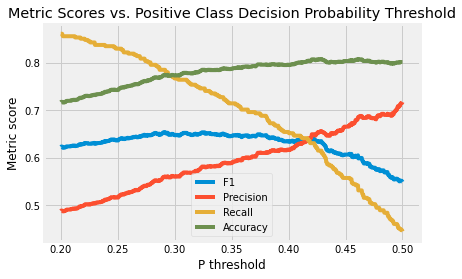

In [141]:
Xthresh_train, ythresh_train = np.array(X_train[columns_model2]), np.array(y_train)
Xthresh_val, ythresh_val = np.array(X_val[columns_model2]), np.array(y_val)

  #fit Random Forest
rf_thresh = RandomForestClassifier(max_depth=6,n_estimators=100)
        
rf_thresh.fit(Xthresh_train, ythresh_train)
        
#output metrics
        
# y_pred = rf_thresh.predict(X_valcv)

thresh_ps = np.linspace(.20,.50,1000)
model_val_probs = rf_thresh.predict_proba(Xthresh_val)[:,1]

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(ythresh_val, model_val_labels))    
    prec_scores.append(precision_score(ythresh_val, model_val_labels))
    rec_scores.append(recall_score(ythresh_val, model_val_labels))
    acc_scores.append(accuracy_score(ythresh_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'])
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

Logistic Regression Model best F1 score 0.658 at prob decision threshold >= 0.294


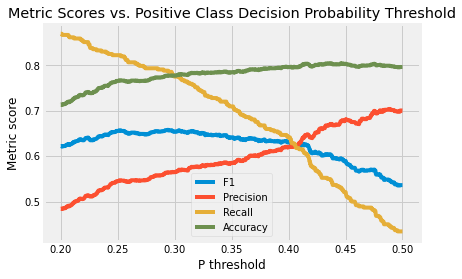

In [142]:
Xthresh_train, ythresh_train = np.array(X_train[columns_model8]), np.array(y_train)
Xthresh_val, ythresh_val = np.array(X_val[columns_model8]), np.array(y_val)

  #fit Random Forest
rf_thresh = RandomForestClassifier(max_depth=6,n_estimators=100)
        
rf_thresh.fit(Xthresh_train, ythresh_train)
        
#output metrics
        
# y_pred = rf_thresh.predict(X_valcv)

thresh_ps = np.linspace(.20,.50,1000)
model_val_probs = rf_thresh.predict_proba(Xthresh_val)[:,1]

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(ythresh_val, model_val_labels))    
    prec_scores.append(precision_score(ythresh_val, model_val_labels))
    rec_scores.append(recall_score(ythresh_val, model_val_labels))
    acc_scores.append(accuracy_score(ythresh_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'])
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

Logistic Regression Model best F1 score 0.658 at prob decision threshold >= 0.285


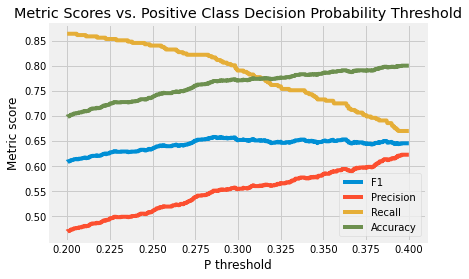

In [145]:
Xthresh_train, ythresh_train = np.array(X_train[columns_model9]), np.array(y_train)
Xthresh_val, ythresh_val = np.array(X_val[columns_model9]), np.array(y_val)

  #fit Random Forest
rf_thresh = RandomForestClassifier(max_depth=5,n_estimators=100)
        
rf_thresh.fit(Xthresh_train, ythresh_train)
        
#output metrics
        
# y_pred = rf_thresh.predict(X_valcv)

thresh_ps = np.linspace(.20,.40,1000)
model_val_probs = rf_thresh.predict_proba(Xthresh_val)[:,1]

f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
for p in thresh_ps:
    model_val_labels = model_val_probs >= p
    f1_scores.append(f1_score(ythresh_val, model_val_labels))    
    prec_scores.append(precision_score(ythresh_val, model_val_labels))
    rec_scores.append(recall_score(ythresh_val, model_val_labels))
    acc_scores.append(accuracy_score(ythresh_val, model_val_labels))
    
plt.plot(thresh_ps, f1_scores)
plt.plot(thresh_ps, prec_scores)
plt.plot(thresh_ps, rec_scores)
plt.plot(thresh_ps, acc_scores)

plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
plt.legend(['F1','Precision','Recall','Accuracy'])
plt.xlabel('P threshold')
plt.ylabel('Metric score')

best_f1_score = np.max(f1_scores) 
best_thresh_p = thresh_ps[np.argmax(f1_scores)]

print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
      % (best_f1_score, best_thresh_p))

## Best threshold to use for model 9 based on P threshold values above optomized for F1.

In [170]:
threshold_model9 = 0.285

## Use Shap Values to Explain Random Forest Model

In [152]:
shap.initjs()

In [153]:
modelshap = RFSMOTEtest(columns_model9,y_trainval,n_estimators=100,max_depth=6)

In [154]:
explainer = shap.TreeExplainer(modelshap)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


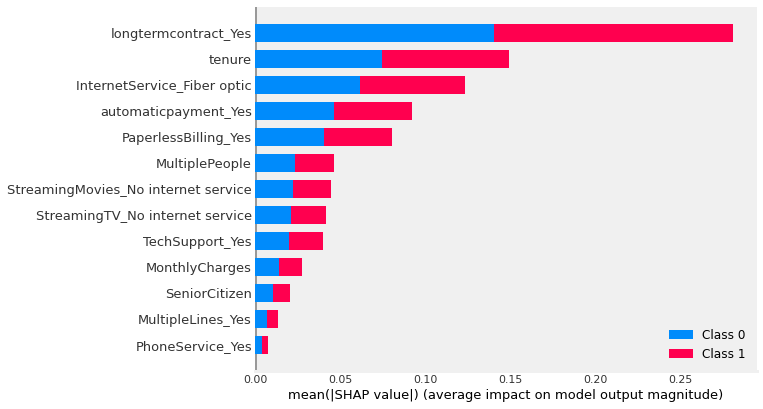

In [156]:
fshap = plt.figure()
plt.grid(b=None)
shap.summary_plot(shap_values, X_trainval[columns_model9])
fshap.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

## Run Model on Test

In [157]:
X_test['MultiplePeople'] = np.where((X_test['Partner_Yes']==1)|(X_test['Dependents_Yes']==1),1,0)

In [158]:
X_test_model = X_test[columns_model9]

In [159]:
def RFSMOTEtest(columns,y_trainval,n_estimators,max_depth):
    '''
    Function that creates a Random Forest Model to be applied to the test dataframe.
    Uses SMOTE to adjust for class imbalance.
    '''
    
    X, y = np.array(X_trainval[columns]), np.array(y_trainval)
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 71)
    accuracy_rf, f1_rf, prec_rf, recall_rf, auc_scores = [], [], [], [], [] #collect the validation results for both models

    for train_ind, val_ind in kf.split(X,y):
        X_traincv, y_traincv = X[train_ind], y[train_ind]
        X_valcv, y_valcv = X[val_ind], y[val_ind] 
        
        #fix class imbalance first:
        SMOTE = imblearn.over_sampling.SMOTE(random_state=42)
    
        X_tr_smote, y_tr_smote = SMOTE.fit_sample(X_traincv, y_traincv) #xtr_smote and y_tr_smote shape is now 6588. There are now 3294 rows where y_tr_smote=0 and y_tr_smote=1
        
  
        #fit Random Forest
        
        rf_smote = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
        
        saved_model = rf_smote.fit(X_tr_smote, y_tr_smote)
        
        #output metrics
        feat_imp = rf_smote.feature_importances_


    return (rf_smote)

In [167]:
ytestpred = RFSMOTEtest(columns_model9,y_trainval,n_estimators=100,max_depth=6).predict(X_test[columns_model9])

In [168]:
ytestpredthresh = RFSMOTEtest(columns_model9,y_trainval,n_estimators=100,max_depth=6).predict_proba(X_test[columns_model9])

In [171]:
ytestpredproba = (ytestpredthresh [:,1] >= threshold_model9).astype('int') #use threshold

In [172]:
f1_score(y_test,ytestpredproba)

0.5935828877005348

In [173]:
f1_score(y_test,ytestpred)

0.6215921483097055

In [222]:
X_test.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,longtermcontract_Yes,automaticpayment_Yes,MultiplePeople
5449,5696-CEIQJ,0,67,103.15,6895.50,1,1,1,1,0,...,1,0,1,0,0,0,0,1,1,1
6539,5949-HGVJL,0,26,73.05,1959.50,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2927,5542-TBBWB,0,1,69.90,69.90,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2477,1212-GLHMD,0,3,86.05,244.85,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
6215,2446-BEGGB,1,6,98.25,560.60,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


In [223]:
y_test.head()

5449    0
6539    0
2927    0
2477    0
6215    1
Name: Churn_Yes, dtype: uint8

In [164]:
confusion_matrix(test_df['y_actual'],test_df['y_predicted'])

array([[772, 254],
       [100, 281]])

## Create Columns for Predicted Ys and Predict_Proba Ys to be used in Tableau

In [161]:
test_df = X_test[columns_model9].copy()
test_df['y_actual'] = y_test
test_df['y_predicted'] = RFSMOTEtest(columns_model9,y_trainval,n_estimators=100,max_depth=6).predict(X_test[columns_model9])

In [166]:
test_df.head()

,SeniorCitizen,tenure,MonthlyCharges,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,MultiplePeople,longtermcontract_Yes,automaticpayment_Yes,PaperlessBilling_Yes,y_actual,y_predicted
5449,0,67,103.15,1,0,1,1,0,0,1,1,1,0,0,0
6539,0,26,73.05,1,0,0,1,0,0,1,0,0,1,0,0
2927,0,1,69.90,1,0,1,0,0,0,0,0,0,1,0,1
2477,0,3,86.05,1,0,1,0,0,0,0,0,0,1,0,1
6215,1,6,98.25,1,1,1,0,0,0,0,0,0,1,1,1


## EXPORT DF TO BE USED FOR TABLEAU

In [253]:
test_df.to_csv(r'project3_testdftry2.csv',index=True, header=True, as_index=False)

## Pickled Files to be Used for Flask App:

In [183]:
Xpickle = X_trainval[columns_model9]
ypickle = y_trainval

smote_pickle = imblearn.over_sampling.SMOTE(random_state=42)

X_tr_smote_pickle, y_tr_smote_pickle = smote_pickle.fit_sample(Xpickle,ypickle)
     
rf_smote_pickle = RandomForestClassifier(max_depth=6,n_estimators=100)
        
saved_model_pickle = rf_smote_pickle.fit(X_tr_smote_pickle, y_tr_smote_pickle)

In [176]:
pickle.dump(saved_model_pickle,open("proj3_model9.p","wb"))

pickle.dump(X_tr_smote_pickle,open("proj3_model9SCALER.p","wb"))